In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 180

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


### Analysis

In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
# Columns
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [7]:
# Count columns
len(df.columns)

14

In [8]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [9]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

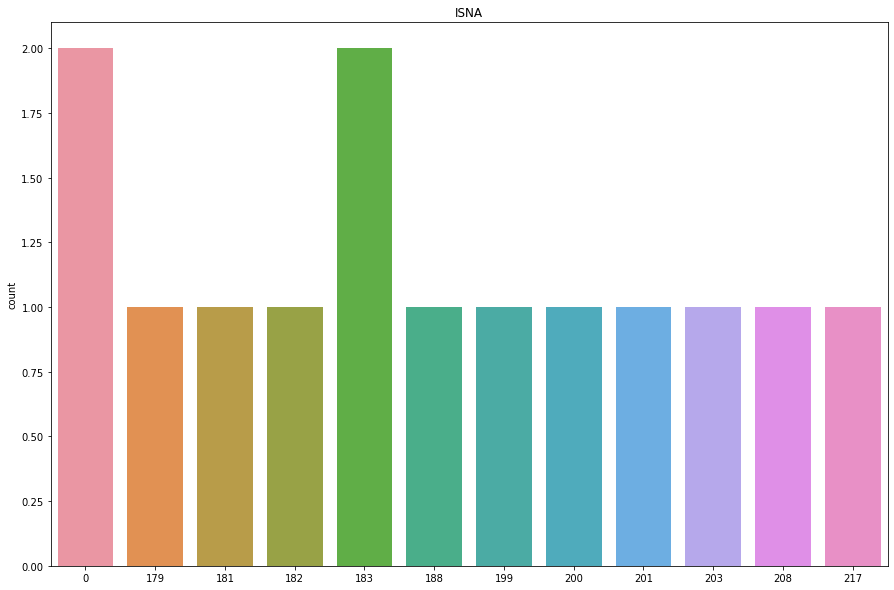

In [10]:
# Create plot
sns.countplot(df.isna().sum())

# Create tittle
plt.title("ISNA")

# Enlarge
plt.figure(1).set_size_inches(15, 10)

plt.show()

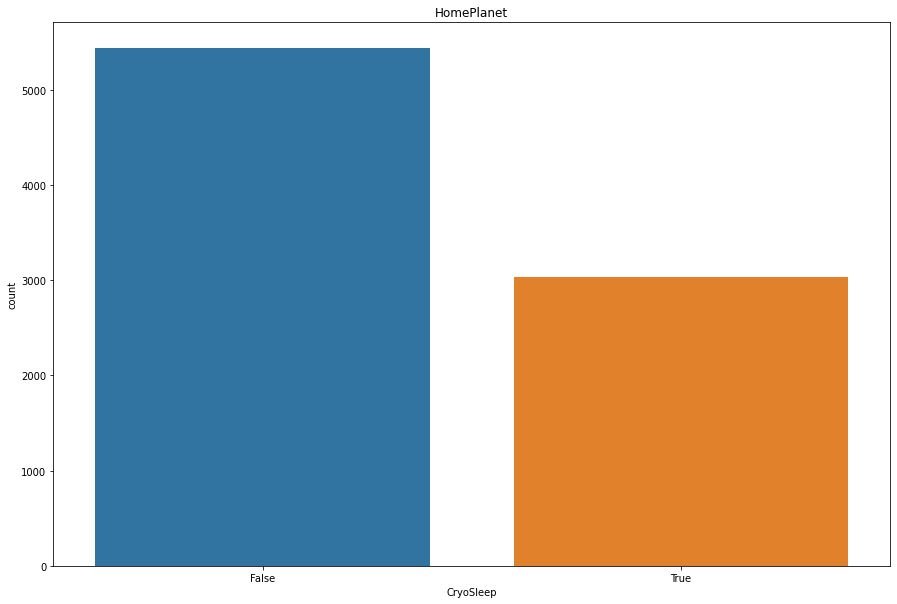

In [11]:
# Create plot
sns.countplot(df.CryoSleep)

# Set title
plt.title("HomePlanet")

# Enlarge
plt.figure(1).set_size_inches(15, 10)

plt.show()

In [12]:
df.Cabin.value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [13]:
df.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

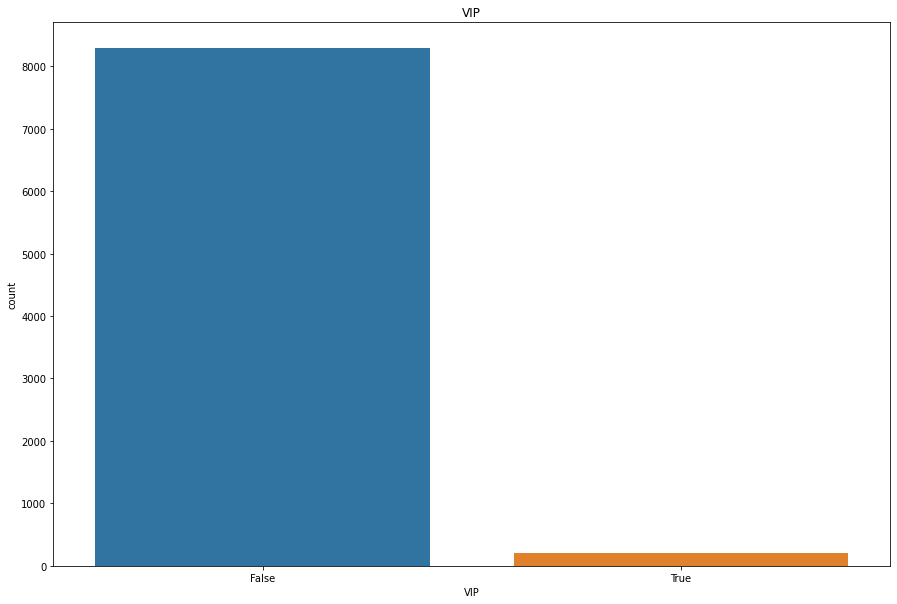

In [14]:
# Create plot
sns.countplot(df.VIP)

# Set title
plt.title("VIP")

# Enlarge
plt.figure(1).set_size_inches(15, 10)

plt.show()

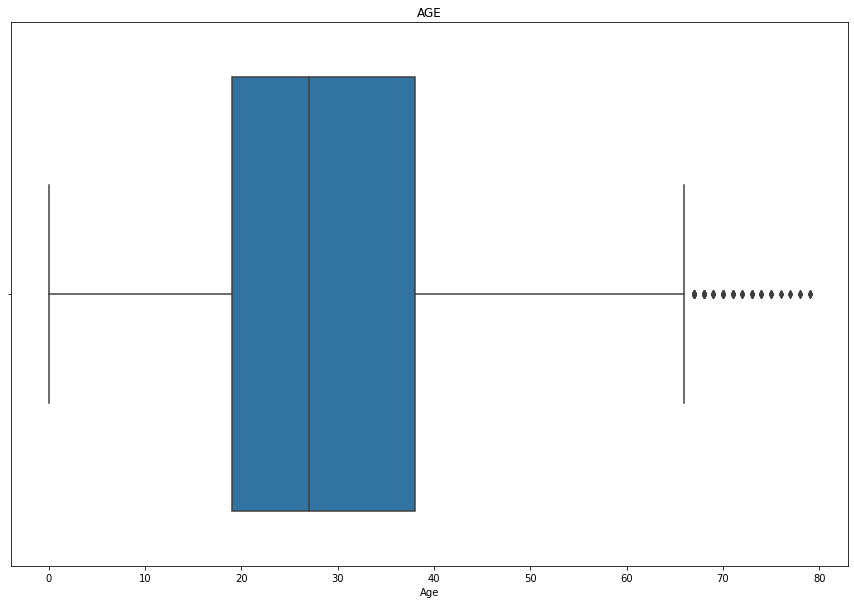

In [15]:
# Create plot
sns.boxplot(df.Age)

# Set title
plt.title("AGE")

# Enlarge
plt.figure(1).set_size_inches(15, 10)

plt.show()

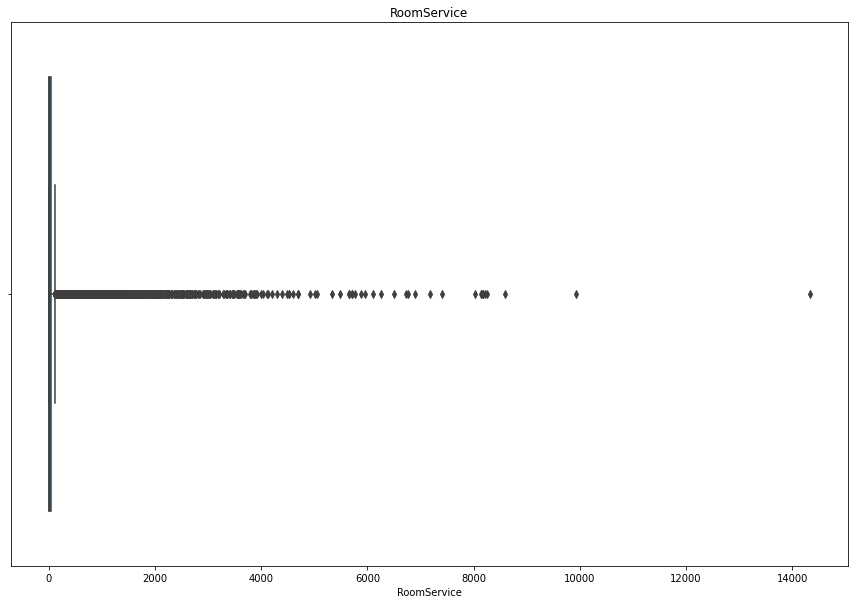

In [16]:
# Create plot
sns.boxplot(df.RoomService)

# Set title
plt.title("RoomService")

# Enlarge
plt.figure(1).set_size_inches(15, 10)

plt.show()

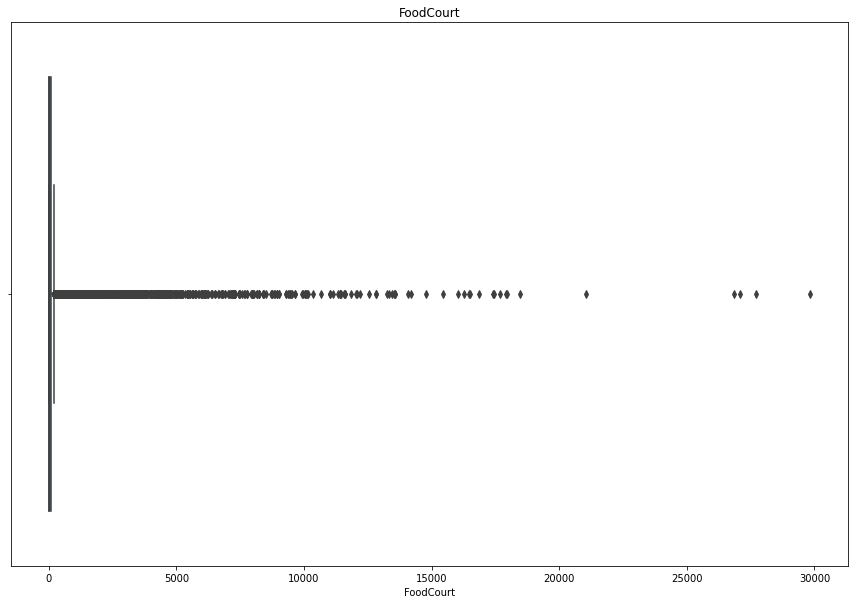

In [17]:
# Create plot
sns.boxplot(df.FoodCourt)

# Set title
plt.title("FoodCourt")

# Enlarge
plt.figure(1).set_size_inches(15, 10)

plt.show()

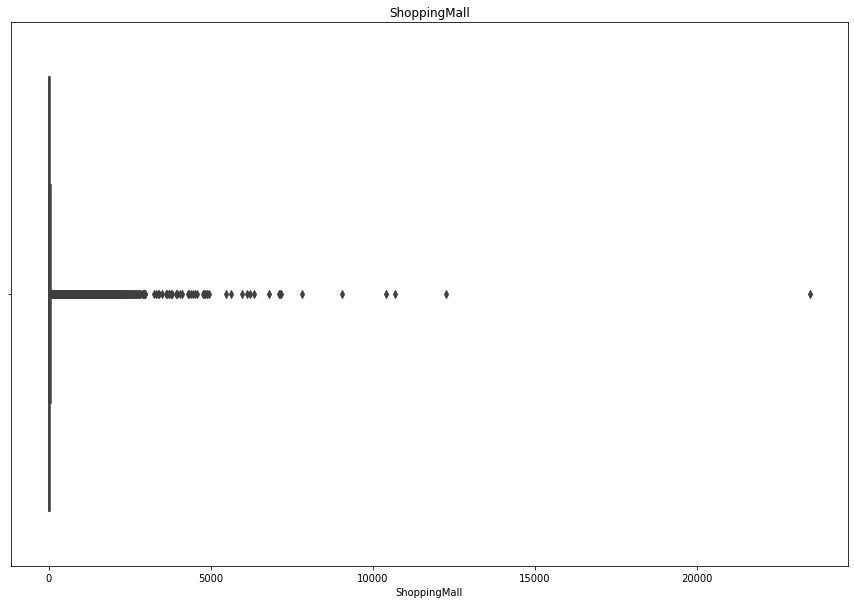

In [18]:
# Create plot
sns.boxplot(df.ShoppingMall)

# Set title
plt.title("ShoppingMall")

# Enlarge
plt.figure(1).set_size_inches(15, 10)

plt.show()

### Preprocessing

In [3]:
X = df[df.columns[1:13]]
Y = df[df.columns[-1]]

In [5]:
X

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [4]:
Y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [6]:
def preprocessing(X,df_test):

    for i in X.columns:

        if df[i].dtypes == 'object':

            X[i] = X[i].fillna(X[i].mode()[0])
            df_test[i] = df_test[i].fillna(df_test[i].mode()[0])

            if len(X[i].unique()) <= 2:

                enc = LabelEncoder()

                X[i] = enc.fit_transform(X[i])

                df_test[i] = enc.transform(df_test[i])

            else:

                # Reset index in dataset
                X.reset_index(inplace=True, drop=True)
                df_test.reset_index(inplace=True, drop=True)

                # Create var with encoder
                encoder2 = OneHotEncoder(handle_unknown="ignore")

                # Train encoder
                encoder2.fit(X[i].values.reshape(-1, 1))

                # Geo name of the columns
                column_name = encoder2.get_feature_names([i])

                # Create dataframe with one hot from train
                encoder_df = pd.DataFrame(
                    encoder2.transform(X[[i]]).toarray(), columns=column_name
                )

                # Create dataframe with one hot from test
                encoder_df2 = pd.DataFrame(
                    encoder2.transform(df_test[[i]]).toarray(), columns=column_name
                )

                # Create join in train
                X = X.join(encoder_df)

                # Create join in test
                df_test = df_test.join(encoder_df2)

                # Delete columns
                X.drop(columns=[i], inplace=True)
                df_test.drop(columns=[i], inplace=True)

        else:

            ############################## FILLNA ############################################
           
            X[i] = X[i].fillna(X[i].median())

            df_test[i] = df_test[i].fillna(df_test[i].median())

            ##################################################################################

            ############################## NORMALIZE #########################################

            scaler = StandardScaler()

            # Train and tranfotm train dataset
            X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))

            # Transform test dataset
            df_test[i] = scaler.transform(df_test[i].values.reshape(-1, 1))

            ##################################################################################


    return X,df_test

In [7]:
# make preprocess
X,df_test = preprocessing(X,df_test)

In [8]:
X

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,Name_Zinopus Spandisket,Name_Zinor Axlentindy,Name_Zinor Proorbeng,Name_Zinoth Lansuffle,Name_Zosmark Trattle,Name_Zosmark Unaasor,Name_Zosmas Ineedeve,Name_Zosmas Mormonized,Name_Zubeneb Flesping,Name_Zubeneb Pasharne
0,0,0.711945,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-0.334037,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2.036857,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.293552,0,-0.333105,0.523010,0.336851,2.687176,-0.092818,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,-0.891895,0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0.851410,1,-0.333105,3.992336,-0.283579,1.189173,-0.197751,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8689,1,-0.752431,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,0,-0.194573,0,-0.333105,-0.281027,2.846999,-0.269737,-0.263003,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8691,0,0.223820,0,-0.333105,0.376365,-0.283579,0.043013,2.589576,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Models

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import GridSearchCV
import xgboost

In [10]:
df_test_id = df_test.drop(columns=['PassengerId'])

# Logistic Regression

In [27]:
LR = LogisticRegression(random_state=42)

LR.fit(X,Y)

LogisticRegression(random_state=42)

In [28]:
pre = LR.predict(df_test_id)

pre_df = pd.DataFrame(pre,columns=["Transported"])

pre_df = pre_df.join(df_test.PassengerId)

pre_df = pre_df[["PassengerId","Transported"]]

# Create dataframe
pre_df.to_csv("PreLR.cvs",index=False,header=1)


""" Score: 0.78793 """

' Score: 0.78793 '

# Random Forest

In [29]:
RF = RandomForestClassifier(random_state=42)

RF.fit(X,Y)

RandomForestClassifier(random_state=42)

In [30]:
preRF = RF.predict(df_test_id)

preRF_df = pd.DataFrame(preRF,columns=["Transported"])

preRF_df = preRF_df.join(df_test.PassengerId)

preRF_df = preRF_df[["PassengerId","Transported"]]

# Create dataframe
preRF_df.to_csv("PreRF.cvs",index=False,header=1)

""" Score: 0.79097 """

' Score: 0.79097 '

# xgboost

In [31]:
XG = xgboost.XGBClassifier()
XG.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [32]:
preXG = XG.predict(df_test_id)

preXG_df = pd.DataFrame(preXG,columns=["Transported"])

preXG_df = preXG_df.join(df_test.PassengerId)

preXG_df = preXG_df[["PassengerId","Transported"]]

preXG_df.to_csv("PreXG.cvs",index=False,header=1)

# LinearSVC

In [33]:
SVM = SVC(random_state=42)

SVM.fit(X,Y)

In [ ]:
preSVM = SVM.predict(df_test_id)
preSVM_df = pd.DataFrame(preSVM,columns=["Transported"])
preSVM_df = preSVM_df.join(df_test.PassengerId)
preSVM_df = preSVM_df[["PassengerId","Transported"]]
preSVM_df.to_csv("PreSVM.csv",index=False,header=1)

In [ ]:
preSVM_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


# KNeighborsClassifier

In [ ]:
KN = KNeighborsClassifier()
KN.fit(X,Y)

KNeighborsClassifier()

In [ ]:
preKN = KN.predict(df_test_id)

preKN_df = pd.DataFrame(preKN,columns=["Transported"])
preKN_df = preKN_df.join(df_test.PassengerId)
preKN_df = preKN_df[["PassengerId","Transported"]]
preKN_df.to_csv("PreKN.csv",index=False,header=1)

In [ ]:
preKN_df

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


# Random Forest Hyperparam

In [ ]:
# Hyperparameter
from ast import YieldFrom


example_hyperparameter_grid = {
 'bootstrap': [True, False],
 'max_depth': [10, 50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200]
}

# Create model
RFCV = RandomForestClassifier(random_state=42)

# search hyperparameters
b = RandomizedSearchCV(RFCV,example_hyperparameter_grid,random_state=42,scoring="roc_auc",cv=3,n_iter=10)

# Create variable with model train
search = b.fit(X,Y)

In [ ]:
search

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 50, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='roc_auc')

In [ ]:
preRFHYPER = search.predict(df_test_id)


preRFHYPER_df = pd.DataFrame(preRFHYPER,columns=["Transported"])
preRFHYPER_df = preRFHYPER_df.join(df_test.PassengerId)
preRFHYPER_df = preRFHYPER_df[["PassengerId","Transported"]]
preRFHYPER_df.to_csv("preRFHYPER.csv",index=False,header=1)

""" Score: 0.77 """

In [ ]:
preRFHYPER_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
preRFHYPER


array([ True, False,  True, ...,  True,  True,  True])

# Catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
""" learning_rate': 0.17, 'max_depth': 4, 'n_estimators': 100 """

cat = CatBoostClassifier(n_estimators=7000,
                         eval_metric='Accuracy',
                        verbose=0,
                       )


cat.fit(X,Y)

In [ ]:
preCat =  cat.predict(df_test_id)
preCat_df = pd.DataFrame(preCat,columns=["Transported"])
preCat_df = preCat_df.join(df_test.PassengerId)
preCat_df = preCat_df[["PassengerId","Transported"]]
preCat_df.to_csv("preCat.csv",index=False,header=1)


""" Score: 0.79845"""

In [ ]:
preCat

array(['True', 'False', 'True', ..., 'True', 'True', 'True'], dtype=object)

# ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
GBR = ExtraTreesClassifier(random_state=42)

GBR.fit(X,Y)

ExtraTreesClassifier(random_state=42)

In [ ]:
preGBR = GBR.predict(df_test_id)
GBR_df = pd.DataFrame(preGBR,columns=["Transported"])
GBR_df = GBR_df.join(df_test.PassengerId)
GBR_df= GBR_df[["PassengerId","Transported"]]
GBR_df.to_csv("GBR.csv",index=False,header=1)

""" Score: 0.77 """

# MLPClassifier

In [11]:
from sklearn.neural_network import MLPClassifier

In [36]:
red = MLPClassifier( hidden_layer_sizes=(20, 20),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123)

In [37]:
red.fit(X,Y)

MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

In [38]:
pre = red.predict(df_test_id)

In [39]:
pre

array([ True, False,  True, ...,  True,  True,  True])

In [40]:

red_df = pd.DataFrame(pre,columns=["Transported"])

red_df = red_df.join(df_test.PassengerId)

red_df= red_df[["PassengerId","Transported"]]

red_df.to_csv("red_df.csv",index=False,header=1)

"""  0.78840 """

In [41]:
import multiprocessing

In [42]:
# ==============================================================================
param_distributions = {
    'hidden_layer_sizes': [(10), (10, 10), (20, 20)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = MLPClassifier(solver = 'lbfgs', max_iter= 2000),
        param_distributions = param_distributions,
        n_iter     = 50, # Número máximo de combinaciones probadas
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

In [44]:
grid.fit(X,Y)

In [43]:
neu = grid.predict()

RandomizedSearchCV(cv=3, estimator=MLPClassifier(max_iter=2000, solver='lbfgs'),
                   n_iter=50, n_jobs=5,
                   param_distributions={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'hidden_layer_sizes': [10, (10, 10),
                                                               (20, 20)],
                                        'learning_rate_init': [0.001, 0.01,
                                                               0.1]},
                   random_state=123, return_train_score=True,
                   scoring='accuracy')